In [24]:
import matplotlib as mpl

from matplotlib import pyplot as plt
mpl.style.use('ggplot')

##########################
#                        #
# ПОИСК КЛЮЧЕВЫХ ЗВЕНЬЕВ #
#                        #
##########################

users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" },
    { "id": 10, "name": "Jen" }
]

friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [25]:
# сначала назначим каждому пользователю пустой список
# свойство friends содержит друзей для пользователя user
for user in users:
    user["friends"] = []

In [26]:
print(users[0])

{'name': 'Hero', 'id': 0, 'friends': []}


In [27]:
# и затем заполним списки друзьями
for i, j in friendships:
    # это работает, потому что users[i] - это пользователь, чей id равен i
    users[i]["friends"].append(users[j]) # добавить i как друга для j
    users[j]["friends"].append(users[i]) # добавить j как друга для i

In [28]:
def number_of_friends(user):
    """сколько друзей есть у пользователя user?"""
    return len(user["friends"]) # длина списка id друзей

total_connections = sum(number_of_friends(user)  # общее число связей
                        for user in users)       # 24

print(total_connections)

24


In [29]:
num_users = len(users)                           # длина списка пользователей
avg_connections = total_connections / num_users  # среднее число связей
print(avg_connections)

2.1818181818181817


In [36]:
# число друзей для каждого id
num_friends_by_id = [(user["id"], number_of_friends(user))
                    for user in users]

# пользователи, отсортированные по количеству друзей
print(sorted(num_friends_by_id, key=lambda pair: pair[1], reverse=True))

[(1, 3), (2, 3), (3, 3), (5, 3), (8, 3), (0, 2), (4, 2), (6, 2), (7, 2), (9, 1), (10, 0)]


In [40]:
######################################
#                                    #
#   ДРУЗЬЯ, КОТОРЫХ ВЫ ДОЛЖНЫ ЗНАТЬ  #
#                                    #
######################################

# счётчик взаимных друзей

from collections import Counter 

# не тот же самый
def not_the_same(user, other_user):
    """два пользователя не одинаковые, если их ключи имеют разные id"""
    return user["id"] != other_user["id"]

# не друзья
def not_friends(user, other_user):
    """other_user - не друг, если он не принадлежит user["friends"], т. е.
    если он not_the_same (не тот же что и все люди в user["friends"])"""
    return all(not_the_same(friend, other_user)
               for friend in user["friends"])

# список id друзей пользователя user
def friends_of_friend_ids(user):
    return Counter(foaf["id"]
                   for friend in user["friends"]  # для каждого моего друга
                   for foaf in friend["friends"]  # подсчитать ИХ друзей,
                   if not_the_same(user, foaf)    # которые не являются мной
                   and not_friends(user, foaf))   # и не мои друзья

In [41]:
print(friends_of_friend_ids(users[3])) # Counter({0: 2, 5: 1})

Counter({0: 2, 5: 1})


In [42]:
# интересующие темы
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

# аналитики, которым нравится целевая тема target_interest (not optimized)
def data_scientists_who_like(target_interest):
    return [user_id
            for user_id, user_interest in interests
            if user_interest == target_interest]

data_scientists_who_like("Python")

[2, 3, 5]

In [43]:
from collections import defaultdict

# id пользователей по значению темы
# ключи - это интересующие темы,
# значения - это списки из id пользователей, интересующихся этой темой
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)
    
print(user_ids_by_interest)

defaultdict(<class 'list'>, {'probability': [3, 6], 'Postgres': [1], 'Haskell': [5], 'Cassandra': [0, 1], 'R': [3, 5], 'NoSQL': [1], 'mathematics': [6], 'Hadoop': [0, 9], 'pandas': [2], 'C++': [5], 'neural networks': [7, 8], 'Java': [0, 5, 9], 'scikit-learn': [2, 7], 'numpy': [2], 'statsmodels': [2], 'MongoDB': [1], 'programming languages': [5], 'statistics': [3, 6], 'Storm': [0], 'libsvm': [4], 'Python': [2, 3, 5], 'scipy': [2], 'decision trees': [4], 'regression': [3, 4], 'MapReduce': [9], 'Big Data': [0, 8, 9], 'Spark': [0], 'artificial intelligence': [8], 'deep learning': [8], 'Mahout': [7], 'HBase': [0, 1], 'machine learning': [4, 7], 'theory': [6]})


In [45]:
# идентификаторы тем по идентификатору пользователя
# ключи - это id пользователей, значения - списки тем для конкретного id
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)
    
print(interests_by_user_id)

defaultdict(<class 'list'>, {0: ['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra'], 1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'], 2: ['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas'], 3: ['R', 'Python', 'statistics', 'regression', 'probability'], 4: ['machine learning', 'regression', 'decision trees', 'libsvm'], 5: ['Python', 'R', 'Java', 'C++', 'Haskell', 'programming languages'], 6: ['statistics', 'probability', 'mathematics', 'theory'], 7: ['machine learning', 'scikit-learn', 'Mahout', 'neural networks'], 8: ['neural networks', 'deep learning', 'Big Data', 'artificial intelligence'], 9: ['Hadoop', 'Java', 'MapReduce', 'Big Data']})


In [49]:
# наиболее общие интересующие темы с пользователем user
def most_common_interests_with(user):
    return Counter(interested_user_id
        for interest in interests_by_user_id[user["id"]]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user["id"])

most_common_interests_with(users[5])

Counter({0: 1, 2: 1, 3: 2, 9: 1})

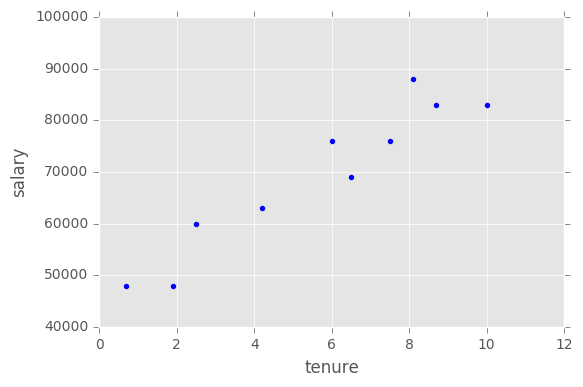

In [50]:
##########################
#                        #
# ЗАРПЛАТЫ И ОПЫТ РАБОТЫ #
#                        #
##########################

# зарплаты и стаж
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

# Зависимость заработной платы от опыта работы
def make_chart_salaries_by_tenure():
    tenures = [tenure for salary, tenure in salaries_and_tenures]
    salaries = [salary for salary, tenure in salaries_and_tenures]
    plt.scatter(tenures, salaries)
    plt.xlabel("tenure")
    plt.ylabel("salary")
    plt.show()
    
make_chart_salaries_by_tenure()    

In [51]:
# зарплата в зависимости от стажа
# ключи - это годы, значения - это списки зарплат для каждого стажа
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

# средняя зарплата в зависимости от стажа
# ключи - это годы, каждое значение - это средняя зарплата по этому стажу
average_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

average_salary_by_tenure

{0.7: 48000.0,
 1.9: 48000.0,
 2.5: 60000.0,
 4.2: 63000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 8.1: 88000.0,
 8.7: 83000.0,
 10: 83000.0}

In [52]:
# стажная группа
def tenure_bucket(tenure):
    if tenure < 2: return "менее двух"
    elif tenure < 5: return "между двумя и пятью"
    else: return "более пяти"

salary_by_tenure_bucket = defaultdict(list)

# зарплата в зависимости от стажной группы
# ключи = стажные группы, значения = списки зарплат в этой группе
# словарь содержит списки зарплат, соответствующие каждой стажной группе
for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

# средняя зарплата по группе
# ключи = стажные группы, значения = средняя зарплата по этой группе
average_salary_by_bucket = {
  tenure_bucket : sum(salaries) / len(salaries)
  for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

average_salary_by_bucket

{'более пяти': 79166.66666666667,
 'между двумя и пятью': 61500.0,
 'менее двух': 48000.0}

In [53]:
############################
#                          #
# ОПЛАТА ПРЕМИУМ-АККАУНТОВ #
#                          #
############################

# предсказать платежи, исходя из стажа
def predict_paid_or_unpaid(years_experience):
    if years_experience < 3.0: return "оплачено"
    elif years_experience < 8.5: return "не оплачено"
    else: return "оплачено"

In [58]:
###################
#                 #
# ПОПУЛЯРНЫЕ ТЕМЫ #
#                 #
###################

# слова и частотности
words_and_counts = Counter(word
                           for user, interest in interests
                           for word in interest.lower().split())




for word, count in words_and_counts.most_common():
    if count > 1:
        print(word, count)

python 3
data 3
learning 3
big 3
java 3
probability 2
networks 2
machine 2
scikit-learn 2
statistics 2
hbase 2
r 2
cassandra 2
hadoop 2
neural 2
regression 2
